In [36]:
# 导入本节需要的库
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, Markdown

# 设置matplotlib参数，使图表更美观
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.style.use('ggplot')

#  gprMax数据格式与解析 📁
本项目是**中南大学智能雷达实验室**为即将进组的同学准备的培训项目，涵盖从Python基础到深度学习在探地雷达领域的应用。项目设计与文档由智能雷达实验室成员精心编写，旨在帮助新成员快速融入实验室研究工作。

## HDF5格式介绍

::: {.incremental}
- HDF5（Hierarchical Data Format version 5）是一种设计用于存储和组织大量数据的文件格式
- 由美国国家超级计算应用中心（NCSA）开发
- 特别适合存储多维数组（矩阵）数据以及元数据
- gprMax使用HDF5格式存储模拟结果
:::

::: {.callout-note appearance="simple"}
### HDF5的主要特点
- 支持**无限多种数据类型**
- 高效的**I/O性能**
- 复杂的**数据模型**可以在单个文件中表示
- **可移植**的开源数据格式

HDF5文件格式如下:
```
HDF5文件
├── 组(Group)
│   ├── 子组(Subgroup)
│   └── 数据集(Dataset)
├── 数据集(Dataset)
└── 属性(Attribute)
```

推荐一款HDF5文件查看器`HDFView`，[进入下载](https://www.hdfgroup.org/download-hdfview/)。
:::

## h5py库的使用
h5py是Python中用于操作HDF5数据文件的库，它能让你用非常 Pythonic 的方式来读写 HDF5 文件。

### 创建和打开HDF5文件
使用`h5py.File()`函数来创建或打开文件。强烈推荐使用`with`语句，它能确保文件在使用完毕后自动关闭，即使发生错误也不会遗漏。

- **模式 (Modes):**
  - 'w' (Write): 创建新文件（如果文件已存在，则覆盖）。
  - 'r' (Read): 只读模式打开文件（文件必须存在）。
  - 'a' (Append): 读写模式打开文件（如果文件不存在则创建）。
  - 'r+' (Read/Write): 读写模式打开文件（文件必须存在）。
  - 'x' 或 'w-' (Exclusive Write):

**示例代码：**


In [37]:
# 示例：创建一个新的 HDF5 文件 (写入模式 'w')
import os
filename = 'test.h5'
try:
    with h5py.File(filename, 'w') as f:
        print(f"\n文件 '{filename}' 创建成功。文件对象: {f}")
        # 文件对象 f 在这里可用
        # 可以进行写入操作...
    print(f"文件 '{filename}' 已自动关闭。")

    # 示例：以只读模式 'r' 打开刚才创建的文件
    if os.path.exists(filename):
        with h5py.File(filename, 'r') as f:
            print(f"\n文件 '{filename}' 以只读模式打开。")
            # 可以进行读取操作...
    else:
        print(f"\n文件 '{filename}' 不存在，无法以只读模式打开。")

except Exception as e:
    print(f"\n操作文件时发生错误: {e}")


文件 'test.h5' 创建成功。文件对象: <HDF5 file "test.h5" (mode r+)>
文件 'test.h5' 已自动关闭。

文件 'test.h5' 以只读模式打开。


### 创建组(Groups)
组用于在 HDF5 文件内部组织数据，就像文件系统中的文件夹。需要在写入(`'w'`) 或追加 (`'a'`) 模式下操作。

**示例代码：**

In [38]:
# 在写入 ('w') 或追加 ('a') 模式下操作
try:
    with h5py.File(filename, 'a') as f:
        print("\n--- 创建组 ---")
        # 创建一个顶级组
        grp1 = f.create_group("sensor_data")
        print(f"创建了组: {grp1.name}") # 输出 '/sensor_data'

        # 创建嵌套组
        sub_grp = grp1.create_group("temperature")
        print(f"创建了嵌套组: {sub_grp.name}") # 输出 '/sensor_data/temperature'

        # 也可以直接使用路径创建嵌套组 (如果父组不存在会自动创建)
        grp_pressure = f.create_group("/sensor_data/pressure")
        print(f"使用路径创建了组: {grp_pressure.name}") # 输出 '/sensor_data/pressure'

        # 检查组是否存在
        if "sensor_data/temperature" in f:
            print("组 '/sensor_data/temperature' 存在。")
except Exception as e:
    print(f"\n操作文件时发生错误: {e}")

if os.path.exists(filename):
    try:
        os.remove(filename)
        print(f"\n示例文件 '{filename}' 已删除。")
    except Exception as e:
        print(f"\n删除文件时发生错误: {e}")


--- 创建组 ---
创建了组: /sensor_data
创建了嵌套组: /sensor_data/temperature
使用路径创建了组: /sensor_data/pressure
组 '/sensor_data/temperature' 存在。

示例文件 'test.h5' 已删除。


### 创建组(Groups)
组用于在 HDF5 文件内部组织数据，就像文件系统中的文件夹。需要在写入 (`'w'`) 或追加 (`'a'`) 模式下操作。

**示例代码**

In [39]:
# 在写入 ('w') 或追加 ('a') 模式下操作
# filename = 'test1.h5'
try:
    with h5py.File(filename, 'a') as f:
        print("\n--- 创建组 ---")
        # 创建一个顶级组
        grp1 = f.create_group("sensor_data")
        print(f"创建了组: {grp1.name}") # 输出 '/sensor_data'

        # 创建嵌套组
        sub_grp = grp1.create_group("temperature")
        print(f"创建了嵌套组: {sub_grp.name}") # 输出 '/sensor_data/temperature'

        # 也可以直接使用路径创建嵌套组 (如果父组不存在会自动创建)
        grp_pressure = f.create_group("/sensor_data/pressure")
        print(f"使用路径创建了组: {grp_pressure.name}") # 输出 '/sensor_data/pressure'

        # 检查组是否存在
        if "sensor_data/temperature" in f:
            print("组 '/sensor_data/temperature' 存在。")
except Exception as e:
    print(f"\n操作文件时发生错误: {e}")


--- 创建组 ---
创建了组: /sensor_data
创建了嵌套组: /sensor_data/temperature
使用路径创建了组: /sensor_data/pressure
组 '/sensor_data/temperature' 存在。


### 创建和写入数据集(Datasets)
数据集用于存储实际的数值数据，通常是 NumPy 数组。需要在写入 (`'w'`) 或追加 (`'a'`) 模式下操作。

**示例代码：**

In [40]:
# 在写入 ('w') 或追加 ('a') 模式下操作
try:
    with h5py.File(filename, 'a') as f:
        print("\n--- 创建和写入数据集 ---")
        # 创建一个 NumPy 数组
        temp_data = np.linspace(20, 35, num=50) # 模拟温度数据

        # 创建数据集并直接存入数据
        # f.create_dataset(路径/名称, data=数据)
        # 如果组不存在，需要先创建组，或者确保路径正确
        if "/sensor_data/temperature" not in f:
             f.create_group("/sensor_data/temperature")
        dset_temp = f.create_dataset("/sensor_data/temperature/run1", data=temp_data)
        print(f"创建并写入了数据集: {dset_temp.name}, 形状: {dset_temp.shape}, 类型: {dset_temp.dtype}")

        # 创建一个空的数据集，指定形状和类型，稍后填充
        pressure_shape = (10, 5)
        if "/sensor_data/pressure" not in f:
            f.create_group("/sensor_data/pressure")
        dset_pressure = f.create_dataset("/sensor_data/pressure/run1", shape=pressure_shape, dtype='float32')
        print(f"创建了空数据集: {dset_pressure.name}, 形状: {dset_pressure.shape}, 类型: {dset_pressure.dtype}")

        # 向空数据集中写入数据 (部分或全部)
        simulated_pressure = np.random.rand(10, 5).astype('float32') * 1000 # 模拟压力数据
        dset_pressure[...] = simulated_pressure # 使用 [...] 或 [:] 写入整个数据集
        print(f"向 '{dset_pressure.name}' 写入了数据。")

        # 写入部分数据
        dset_pressure[0, 0] = 1013.25 # 修改单个值
        dset_pressure[1:3, :] = 0 # 修改几行数据
        print(f"修改了 '{dset_pressure.name}' 中的部分数据。")
except Exception as e:
    print(f"\n操作文件时发生错误: {e}")


--- 创建和写入数据集 ---
创建并写入了数据集: /sensor_data/temperature/run1, 形状: (50,), 类型: float64
创建了空数据集: /sensor_data/pressure/run1, 形状: (10, 5), 类型: float32
向 '/sensor_data/pressure/run1' 写入了数据。
修改了 '/sensor_data/pressure/run1' 中的部分数据。


### 读取数据
访问组和数据集就像访问 Python 字典，读取数据则使用类似 NumPy 的切片操作。需要在读取 (`'r'`) 或追加 (`'a'`, `'r+'`) 模式下操作。

**示例代码：**

In [41]:
# 在读取 ('r') 或追加 ('a', 'r+') 模式下操作
try:
    with h5py.File(filename, 'r') as f:
        print("\n--- 读取数据 ---")
        # 检查路径是否存在
        temp_path = '/sensor_data/temperature/run1'
        pressure_path = '/sensor_data/pressure/run1'

        if temp_path in f:
            # 访问数据集对象
            dset_temp_read = f[temp_path]
            # 读取整个数据集到 NumPy 数组
            temp_values = dset_temp_read[:]
            print(f"读取的温度数据 (前5个): {temp_values[:5]}")
            print(f"温度数据类型: {temp_values.dtype}, 形状: {temp_values.shape}")
        else:
            print(f"路径 '{temp_path}' 不存在。")

        if pressure_path in f:
            dset_pressure_read = f[pressure_path]
            # 读取部分数据 (切片)
            pressure_subset = dset_pressure_read[0:3, 0:2] # 读取前3行，前2列
            print(f"\n读取的压力数据子集:\n{pressure_subset}")
            print(f"压力子集类型: {pressure_subset.dtype}, 形状: {pressure_subset.shape}")

            # 读取单个值
            pressure_first_val = dset_pressure_read[0, 0]
            print(f"\n读取的第一个压力值: {pressure_first_val}")
        else:
             print(f"路径 '{pressure_path}' 不存在。")

except Exception as e:
    print(f"\n操作文件时发生错误: {e}")


--- 读取数据 ---
读取的温度数据 (前5个): [20.         20.30612245 20.6122449  20.91836735 21.2244898 ]
温度数据类型: float64, 形状: (50,)

读取的压力数据子集:
[[1013.25     984.65204]
 [   0.         0.     ]
 [   0.         0.     ]]
压力子集类型: float32, 形状: (3, 2)

读取的第一个压力值: 1013.25


### 使用属性(Attributes)
属性用于存储描述组或数据集的元数据（小段信息，如单位、描述、日期等）。访问和操作属性通过组或数据集对象的 `.attrs` 接口进行，该接口行为类似 Python 字典。

**示例代码：**

In [42]:
# 在写入 ('w') 或追加 ('a') 模式下操作
try:
    with h5py.File(filename, 'a') as f:
        print("\n--- 操作属性 ---")
        # 给根目录 '/' 添加属性
        f.attrs['creation_date'] = '2025-04-15' # 使用当天日期
        f.attrs['author'] = 'H5py Demo'

        # 给组添加属性 (确保组存在)
        if '/sensor_data/temperature' in f:
            temp_group = f['/sensor_data/temperature']
            temp_group.attrs['location'] = 'Lab A'
        else:
            print("组 '/sensor_data/temperature' 不存在，无法添加属性。")


        # 给数据集添加属性 (确保数据集存在)
        temp_path = '/sensor_data/temperature/run1'
        if temp_path in f:
            dset_temp = f[temp_path]
            dset_temp.attrs['units'] = 'Celsius'
            dset_temp.attrs['accuracy'] = 0.1
            print("已添加属性。")
        else:
            print(f"数据集 '{temp_path}' 不存在，无法添加属性。")

except Exception as e:
    print(f"\n操作文件时发生错误: {e}")


# 读取属性
try:
    with h5py.File(filename, 'r') as f:
        print("\n--- 读取属性 ---")
        if 'author' in f.attrs:
            author = f.attrs['author']
            print(f"文件作者: {author}")

        if '/sensor_data/temperature' in f and 'location' in f['/sensor_data/temperature'].attrs:
            location = f['/sensor_data/temperature'].attrs['location']
            print(f"温度传感器位置: {location}")

        temp_path = '/sensor_data/temperature/run1'
        if temp_path in f and 'units' in f[temp_path].attrs:
            temp_units = f[temp_path].attrs['units']
            print(f"温度数据单位: {temp_units}")
except Exception as e:
    print(f"\n操作文件时发生错误: {e}")


--- 操作属性 ---
已添加属性。

--- 读取属性 ---
文件作者: H5py Demo
温度传感器位置: Lab A
温度数据单位: Celsius


### 查看文件结构
你可以想浏览字典一样查看HDF5文件的内部结构，例如使用`.keys()`方法或递归遍历。

**示例代码：**

In [43]:
def print_hdf5_structure(group, indent=''):
    """递归打印 HDF5 文件结构"""
    try:
        for key in group.keys():
            item = group[key]
            item_info = f"{indent}'- {key}"
            if isinstance(item, h5py.Dataset):
                item_info += f" (Dataset: shape {item.shape}, dtype {item.dtype})"
                print(item_info)
                # 打印属性 (如果需要详细信息)
                # for attr_key in item.attrs.keys():
                #     print(f"{indent}    - {attr_key} (Attribute)")
            elif isinstance(item, h5py.Group):
                item_info += " (Group)"
                print(item_info)
                # 打印属性 (如果需要详细信息)
                # for attr_key in item.attrs.keys():
                #     print(f"{indent}    - {attr_key} (Attribute)")
                print_hdf5_structure(item, indent + '  ') # 递归调用
    except Exception as e:
        print(f"{indent}无法访问组 '{group.name}' 的内容: {e}")


# 打开文件并打印结构
try:
    with h5py.File(filename, 'r') as f:
        print("\n--- 文件结构 ---")
        print(f"'{filename}'/")
        print_hdf5_structure(f)
except Exception as e:
    print(f"\n打开文件或打印结构时发生错误: {e}")


# 清理创建的文件 (可选)
if os.path.exists(filename):
    try:
        os.remove(filename)
        print(f"\n示例文件 '{filename}' 已删除。")
    except Exception as e:
        print(f"\n删除文件时发生错误: {e}")


--- 文件结构 ---
'test.h5'/
'- sensor_data (Group)
  '- pressure (Group)
    '- run1 (Dataset: shape (10, 5), dtype float32)
  '- temperature (Group)
    '- run1 (Dataset: shape (50,), dtype float64)

示例文件 'test.h5' 已删除。


## gprMax 输出文件 (HDF5) 结构说明与处理

gprMax 将其仿真结果保存在一个与输入文件同名但后缀为 `.out` 的 HDF5 文件中。这个文件内部像一个有层次的文件柜，包含了模型的设置信息和各个接收点、源等的仿真数据。

了解其内部结构对于我们后续提取和分析数据非常重要。

  文件根目录 (`/`) 属性

在 HDF5 文件的最顶层（根目录 `/`），存储着关于整个模型和仿真的 **全局属性 (Attributes)**，相当于这个“文件柜”的总标签。主要包含：

* `gprMax`: 创建此文件的 gprMax 版本号。
* `Title`: 模型的标题（通常来自输入文件）。
* `Iterations`: 模型仿真的总时间步（迭代）数量。
* `nx_ny_nz`: 一个包含模型 x, y, z 方向网格单元数量的元组 `(nx, ny, nz)`。
* `dx_dy_dz`: 一个包含模型空间离散化步长的元组 `(Δx, Δy, Δz)`，单位通常是米。
* `dt`: 模型仿真的时间步长 `Δt`，单位通常是秒。
* `srcsteps` (可能存在): 源在多次运行中的空间移动增量。
* `rxsteps` (可能存在): 接收器在多次运行中的空间移动增量。
* `nsrc`: 模型中源的总数量。
* `nrx`: 模型中接收器的总数量。

### 主要数据组 (Groups)

根目录下通常包含以下几个主要的 **组 (Groups)**，像文件柜里的大抽屉，分类存放不同类型的数据：

* `/rxs/`: 包含所有 **接收器 (Receivers)** 的数据。
* `/srcs/`: 包含所有 **源 (Sources)** 的信息。
* `/tls/`: 包含所有 **传输线 (Transmission Lines)** 的数据（如果模型中有定义）。

###  接收器组 (`/rxs/`) 内部结构

这个组 `/rxs/` 里面包含了对应模型中每一个接收器的子组，命名通常是 `rx1`, `rx2`, ... 等。

* **每个接收器子组 (例如 `/rxs/rx1/`) 包含:**

    * **属性 (Attributes):**
        * `Name`: 接收器的名称。若未指定，则默认为 `'Rx(x,y,z)'` 格式。
        * `Position`: 接收器在模型中的 `(x, y, z)` 坐标位置（单位：米）。

    * **数据集 (Datasets):** 这些是 **时间序列数组**，记录了在该接收器位置的场或电流分量值随时间的变化：
        * `Ex`: 电场 x 分量的时间历史。
        * `Ey`: 电场 y 分量的时间历史。
        * `Ez`: 电场 z 分量的时间历史。
        * `Hx`: 磁场 x 分量的时间历史。
        * `Hy`: 磁场 y 分量的时间历史。
        * `Hz`: 磁场 z 分量的时间历史。
        * `Ix` (可选): 电流 x 分量的时间历史。
        * `Iy` (可选): 电流 y 分量的时间历史。
        * `Iz` (可选): 电流 z 分量的时间历史。

###  源组 (`/srcs/`) 内部结构

这个组 `/srcs/` 里面包含了对应模型中每一个源的子组，命名通常是 `src1`, `src2`, ... 等。

* **每个源子组 (例如 `/srcs/src1/`) 包含:**

    * **属性 (Attributes):**
        * `Type`: 源的类型 (例如 `Hertzian dipole`, `voltage source` 等)。
        * `Position`: 源在模型中的 `(x, y, z)` 坐标位置（单位：米）。
    * *(注意：源的时域波形通常在输入文件中定义，不直接存储为这里的数据集)*
  
###  传输线组 (`/tls/`) 内部结构 (如果存在)

如果模型中定义了传输线，`/tls/` 组里面会包含对应每一条传输线的子组，命名通常是 `tl1`, `tl2`, ... 等。

* **每个传输线子组 (例如 `/tls/tl1/`) 包含:**

    * **属性 (Attributes):**
        * `Position`: 传输线（通常指源端）的 `(x, y, z)` 坐标位置（单位：米）。
        * `Resistance`: 传输线的电阻。
        * `dl`: 传输线的空间离散化步长。

    * **数据集 (Datasets):** **时间序列数组**：
        * `Vinc`: 入射电压的时间历史。
        * `Iinc`: 入射电流的时间历史。
        * `Vtotal`: 总（场）电压的时间历史。
        * `Itotal`: 总（场）电流的时间历史。


### 查看一个Ascan信号的out文件结构

In [44]:
# 基本导入
import h5py
import numpy as np
import matplotlib.pyplot as plt

# 打开一个out文件
out_file = "./gprMax/user_models/cylinder_Ascan_2D.out"

# 查看一个out文件的文件结构
try:
    with h5py.File(out_file, 'r') as f:
        print("\n--- 文件结构 ---")
        print(f"'{filename}'/")
        print_hdf5_structure(f)
except Exception as e:
    print(f"\n打开文件或打印结构时发生错误: {e}")


--- 文件结构 ---
'test.h5'/
'- rxs (Group)
  '- rx1 (Group)
    '- Ex (Dataset: shape (637,), dtype float32)
    '- Ey (Dataset: shape (637,), dtype float32)
    '- Ez (Dataset: shape (637,), dtype float32)
    '- Hx (Dataset: shape (637,), dtype float32)
    '- Hy (Dataset: shape (637,), dtype float32)
    '- Hz (Dataset: shape (637,), dtype float32)
'- srcs (Group)
  '- src1 (Group)


### 使用Ascan信号的数据

<HDF5 group "/rxs" (1 members)>
<HDF5 group "/rxs/rx1" (6 members)>
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.9095780e-20 1.4829537e-18 5.2303778e-10 2.1995394e-09
 2.6809463e-08 9.8489551e-08 4.7862255e-07 1.4285239e-06 4.1769927e-06
 9.7736902e-06 2.0314423e-05 3.6964546e-05 5.9162347e-05 8.5044863e-05
 1.1044663e-04 1.3231549e-04 1.5094173e-04 1.6993804e-04 1.9553785e-04
 2.3411507e-04 2.8910101e-04 3.6092466e-04 4.4818324e-04 5.4823660e-04
 6.5843528e-04 7.7868381e-04 9.1277983e-04 1.0688147e-03 1.2574688e-03]


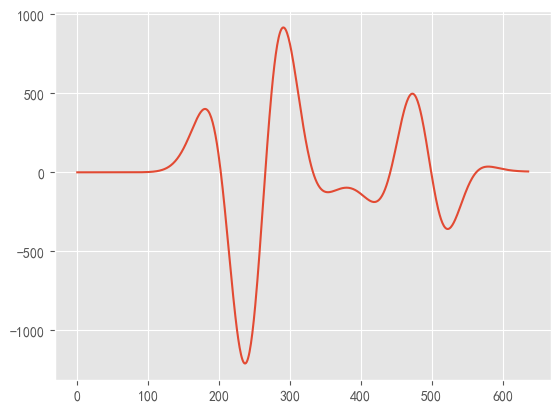

In [45]:
# 如文件对象是 f
f = h5py.File(out_file, 'r')
receivers_group = f['/rxs'] # 访问名为 'rxs' 的组
print(receivers_group)
receiver1_group = f['/rxs/rx1'] # 访问 'rxs' 组下的 'rx1' 子组
print(receiver1_group)
ez_data = f['/rxs/rx1/Ez'] # 访问 'rx1' 组下的 'Ez' 数据集
print(ez_data[:50]) # 查看Ez Ascan数据前50个采样点

plt.plot(ez_data[:]) # 画出Ez数据的 Ascan波形图
plt.show()

### Bscan数据out文件结构
通过PartOne的学习我们知道，一个Bscan数据可以通过合成孔径方式和实孔径方式获得，合成孔径方式是gprMax提供的标准方式，一次性跑多个Ascan数据，然后通过`python -m tools.outputfiles_merge filename`的命令将多个Ascan信号合成为一个Bscan信号。

同理，如果我们使用实孔径方式生成Bscan数据，也需要一个脚本命令把多个接收天线接收到的Ascan信号合成为一个完整的Bscan信号。

下面我们分别通过合成孔径与实孔径的方式对gprMax给出的二维示例分别编写in文件

**合成孔径.in文件：**
```合成孔径
#title: B-scan from a metal cylinder buried in a dielectric half-space
#domain: 0.240 0.210 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-9

#material: 6 0 1 0 half_space

#waveform: ricker 1 1.5e9 my_ricker
#hertzian_dipole: z 0.040 0.170 0 my_ricker
#rx: 0.080 0.170 0
#src_steps: 0.002 0 0
#rx_steps: 0.002 0 0

#box: 0 0 0 0.240 0.170 0.002 half_space
#cylinder: 0.120 0.080 0 0.120 0.080 0.002 0.010 pec
```

**实孔径.in文件：**
```实孔径
#title: B-scan from a metal cylinder buried in a dielectric half-space real_aperture
#domain: 0.240 0.210 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-9

#material: 6 0 1 0 half_space

#waveform: ricker 1 1.5e9 my_ricker
#hertzian_dipole: z 0.140 0.170 0 my_ricker

#rx_array: 0.080 0.170 0 0.200  0.170 0 0.002 0 0

#box: 0 0 0 0.240 0.170 0.002 half_space
#cylinder: 0.120 0.080 0 0.120 0.080 0.002 0.010 pec
```
然后通过gprMax进行仿真计算得到out文件，我们通过前面编写好的代码，查看out文件结构如下：


In [48]:
#| class-output: output-scroll
# 分别查看合成孔径与实孔径数据的HDF5文件结构
out_files = ["./gprMax/user_models/cylinder_Bscan_2D_merged.out", "./gprMax/user_models/cylinder_Bscan_2D_real_aperture.out"]

# 查看一个out文件的文件结构
try:
    for file_name in out_files:
        with h5py.File(file_name, 'r') as f:
            print("\n--- 文件结构 ---")
            print(f"'{filename}'/")
            print_hdf5_structure(f)
except Exception as e:
    print(f"\n打开文件或打印结构时发生错误: {e}")


--- 文件结构 ---
'test.h5'/
'- rxs (Group)
  '- rx1 (Group)
    '- Ex (Dataset: shape (637, 60), dtype float32)
    '- Ey (Dataset: shape (637, 60), dtype float32)
    '- Ez (Dataset: shape (637, 60), dtype float32)
    '- Hx (Dataset: shape (637, 60), dtype float32)
    '- Hy (Dataset: shape (637, 60), dtype float32)
    '- Hz (Dataset: shape (637, 60), dtype float32)

--- 文件结构 ---
'test.h5'/
'- rxs (Group)
  '- rx1 (Group)
    '- Ex (Dataset: shape (637,), dtype float32)
    '- Ey (Dataset: shape (637,), dtype float32)
    '- Ez (Dataset: shape (637,), dtype float32)
    '- Hx (Dataset: shape (637,), dtype float32)
    '- Hy (Dataset: shape (637,), dtype float32)
    '- Hz (Dataset: shape (637,), dtype float32)
  '- rx10 (Group)
    '- Ex (Dataset: shape (637,), dtype float32)
    '- Ey (Dataset: shape (637,), dtype float32)
    '- Ez (Dataset: shape (637,), dtype float32)
    '- Hx (Dataset: shape (637,), dtype float32)
    '- Hy (Dataset: shape (637,), dtype float32)
    '- Hz (Datase

**如果不想写代码查看输出的HDF5文件结构，也可以使用前面推荐`HDFView软件查看`**

HDFView软件使用起来更加方便且可以以更加便捷的方式查看数据值的分布，并且可以方便画出其中的Ascan数据
![](./resource/合成孔径和实孔径数据对比.png){fig-align="center"}
![](./resource/HDFView画Ascan.png){fig-align="center"}


### 合并实孔径方式探测的Ascan以获得Bscan数据

1. 从上面的文件结构很清楚的看出每个`rx`数据集，就代表一个接收天线得到的6组数据。

2. 对于合成孔径探测方式得到的Ascan数据，每一个Ascan数据都单独存放在一个文件中。

3. 对于实孔径探测方式得到的Ascan数据，都存放在一个文件中，但是通过HDF5文件将数据组织在不同的`rx`数据集下。

4. 为了将Ascan数据合成二维的Bscan数据，其实就是将所有接收天线的`rx`数据中的一维数据横向拼接在一起，就可以得到Bscan数据。

5. 同理，我们可以推广到Cscan数据，Cscan数据就是将二维的Bscan数据沿着某个维度堆叠起来，就可以得到Cscan数据。

三维空间中一个角度倾斜的圆柱体的A、B、Cscan数据示意图如下：
![](./resource/ABCscan图片.png){fig-align="center"}


In [51]:
# 下面是gprMax软件包tools.outputfiles_merge的源代码
import glob
def merge_files(basefilename, removefiles=False):
    """Merges traces (A-scans) from multiple output files into one new file,
        then optionally removes the series of output files.

    Args:
        basefilename (string): Base name of output file series including path.
        outputs (boolean): Flag to remove individual output files after merge.
    """

    outputfile = basefilename + '_merged.out'
    files = glob.glob(basefilename + '[0-9]*.out')
    outputfiles = [filename for filename in files if '_merged' not in filename]
    modelruns = len(outputfiles)

    # Combined output file
    fout = h5py.File(outputfile, 'w')

    # Add positional data for rxs
    for model in range(modelruns):
        fin = h5py.File(basefilename + str(model + 1) + '.out', 'r')
        nrx = fin.attrs['nrx']

        # Write properties for merged file on first iteration
        if model == 0:
            fout.attrs['Title'] = fin.attrs['Title']
            fout.attrs['gprMax'] = __version__
            fout.attrs['Iterations'] = fin.attrs['Iterations']
            fout.attrs['dt'] = fin.attrs['dt']
            fout.attrs['nrx'] = fin.attrs['nrx']
            for rx in range(1, nrx + 1):
                path = '/rxs/rx' + str(rx)
                grp = fout.create_group(path)
                availableoutputs = list(fin[path].keys())
                for output in availableoutputs:
                    grp.create_dataset(output, (fout.attrs['Iterations'], modelruns), dtype=fin[path + '/' + output].dtype)

        # For all receivers
        for rx in range(1, nrx + 1):
            path = '/rxs/rx' + str(rx) + '/'
            availableoutputs = list(fin[path].keys())
            # For all receiver outputs
            for output in availableoutputs:
                fout[path + '/' + output][:, model] = fin[path + '/' + output][:]

        fin.close()

    fout.close()

    if removefiles:
        for model in range(modelruns):
            file = basefilename + str(model + 1) + '.out'
            os.remove(file)

# 这是根据上面代码实现的实孔径Bscan合成函数，基于gprMax源文件修改            
def real_aperture_merge_files(basefilename):
    """将用实孔径方法扫描出的文件合成为能画出Bscan图像的格式"""
    outputfile = basefilename + '_merged.out'
    files = glob.glob(basefilename + '.out')

    # Combined output file
    fout = h5py.File(outputfile, 'w')

    # Add positional data for rxs
    for model in range(1):
        print(basefilename)
        fin = h5py.File(basefilename + '.out', 'r')
        # sys.exit(0)
        if not fin:
            print("没找到输入文件")
        nrx = fin.attrs['nrx']

        # Write properties for merged file on first iteration
        if model == 0:
            fout.attrs['Title'] = fin.attrs['Title']
            fout.attrs['gprMax'] = fin.attrs['gprMax']
            fout.attrs['Iterations'] = fin.attrs['Iterations']
            fout.attrs['dt'] = fin.attrs['dt']
            fout.attrs['nrx'] = 1
            for rx in range(1, 2):
                path = '/rxs/rx' + str(rx)
                grp = fout.create_group(path)
                availableoutputs = list(fin[path].keys())
                for output in availableoutputs:
                    grp.create_dataset(output, (fout.attrs['Iterations'], nrx), dtype=fin[path + '/' + output].dtype)

        # For all receivers
        for rx in range(1, nrx + 1):
            origin_path = '/rxs/rx1'
            path = '/rxs/rx' + str(rx)
            availableoutputs = list(fin[path].keys())
            # For all receiver outputs
            for output in availableoutputs:
                fout[origin_path + '/' + output][:, rx - 1] = fin[path + '/' + output][:]

        fin.close()

    fout.close()

./gprMax/user_models/cylinder_Bscan_2D_real_aperture


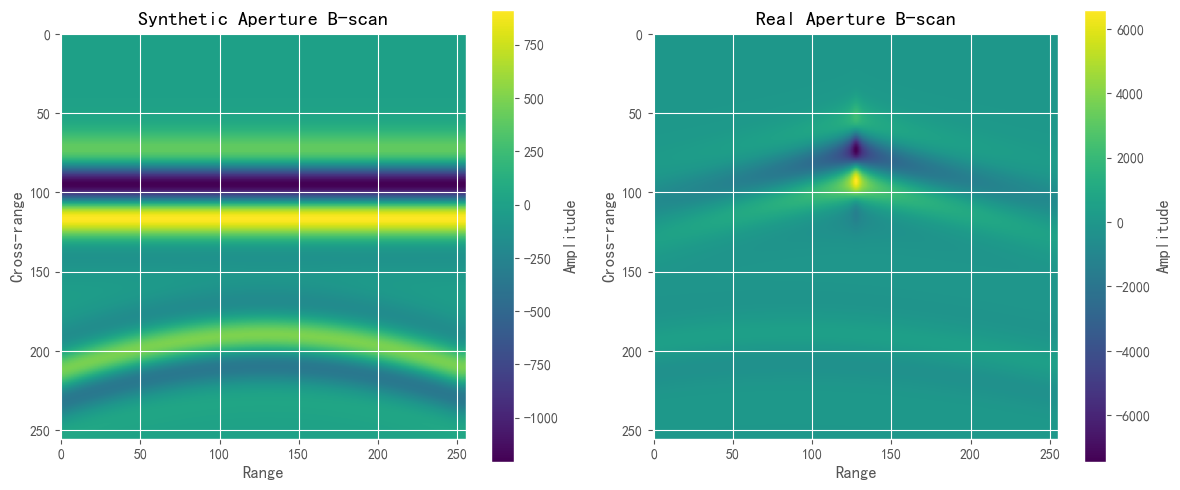

In [58]:
# 通过上面的函数可以合成实孔径探测得到的Bscan数据

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

out_files = ["./gprMax/user_models/cylinder_Bscan_2D_merged.out", "./gprMax/user_models/cylinder_Bscan_2D_real_aperture.out"]
real_aperture_merge_files(out_files[1].replace('.out', ''))
out_files[1] = out_files[1].replace('.out', '_merged.out')

data1, data2 = None, None
try:
    with h5py.File(out_files[0], 'r') as f:
        data1 = f['rxs/rx1/Ez'][:]
    with h5py.File(out_files[1], 'r') as f:
        data2 = f['rxs/rx1/Ez'][:]  
except Exception as e:
    print(f"\n打开文件或打印结构时发生错误: {e}")

# resieze 256*256
from skimage import transform
data1, data2 = transform.resize(data1, (256, 256)), transform.resize(data2, (256, 256))

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot synthetic aperture B-scan
im1 = ax1.imshow(data1, cmap='viridis')
ax1.set_title('Synthetic Aperture B-scan')
ax1.set_xlabel('Range')
ax1.set_ylabel('Cross-range')
fig.colorbar(im1, ax=ax1, label='Amplitude')

# Plot real aperture B-scan
im2 = ax2.imshow(data2, cmap='viridis')
ax2.set_title('Real Aperture B-scan')
ax2.set_xlabel('Range')
ax2.set_ylabel('Cross-range')
fig.colorbar(im2, ax=ax2, label='Amplitude')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

# gprMax高级功能 ⚙️
## gprMax场景导出
> 当我们需要获得仿真场景中更精细的信息时，就要用到gprMax场景导出的功能。例如在反演任务中，我们需要知道地下场景的`介电常数分布`。

gprMax场景导出需要在in文件中用到**`#geometry_objects_write`**命令，具体使用细节请查看[文档介绍](https://docs.gprmax.com/en/latest/input.html#geometry-objects-write)。

简单介绍两点，使用场景导出命令运行gprMax仿真后，会产生两个额外的文件 **`filename.h5`** 和 **`filename_materials.txt`**。
-  **`filename.h5：`** 记录了地下场景的空间分布信息是个三维数组；每一个数组元素表示一个空间中的离散块，数组值表示此离散块的材质编号，编号从0开始。
-  **`filename_materials.txt：`** 记录了地下场景可能存在的所有材质，文本内容与gprMax软件中`#material`命令定义方式一样。此文件中的材质与`filename.h5`文件对应。


## gprMax场景导入
同理，gprMax场景导入是gprMax导出的逆过程，需要自己构造 **`filename.h5`** 和 **`filename_materials.txt`** 这两个文件，并利用**`#geometry_objects_read`**命令导入。

这个命令尝试的比较少，没有尝试过构造复杂的场景导入进去，后续感兴趣的同学可以自己尝试。

## 将导出的场景映射成可用的介电常数分布或其它
前面提到**`#geometry_objects_write`**命令能够导出两个文件，通过这两个文件，我们可以方便的构建出地下介电常数分布。

但是其中还是存在一些坑，**`#geometry_objects_write`**命令导出的场景坐标系和我们正常查看的坐标不一样，需要进行转换。下面提供一个我编写的常用的脚本，后续可以根据自己需要修改。

In [60]:
import os
import h5py
import numpy as np

def modify_h5_files(input_folder, output_folder, value_mapping):
    """
    读取输入文件夹中的h5文件，逆时针旋转90度，修改'data'中的值，删除前50行，并保存到输出文件夹。
    
    :param input_folder: 输入h5文件的文件夹路径
    :param output_folder: 输出修改后h5文件的文件夹路径
    :param value_mapping: 字典，键为要替换的原始值，值为新的替换值
    """
    # 确保输出文件夹存在
    os.makedirs(output_folder, exist_ok=True)
    
    # 获取输入文件夹中所有的h5文件
    h5_files = [f for f in os.listdir(input_folder) if f.endswith('.h5')]
    
    for file_name in h5_files:
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)
        
        with h5py.File(input_path, 'r') as input_file:
            # 读取原始数据
            original_data = input_file['data'][:]
            
            # 逆时针旋转90度
            rotated_data = np.rot90(original_data)
            
            # 创建一个新的数组来存储修改后的数据
            modified_data = np.copy(rotated_data)
            
            # 创建一个掩码数组来跟踪已经修改过的位置
            modified_mask = np.zeros_like(rotated_data, dtype=bool)
            
            # 按照value_mapping中的顺序替换值
            for old_value, new_value in value_mapping.items():
                # 找到等于old_value的位置，并且这些位置还没有被修改过
                mask = (rotated_data == old_value) & (~modified_mask)
                modified_data[mask] = new_value
                modified_mask[mask] = True
            
            # 删除前50行，保留400*750的大小
            modified_data = modified_data[50:, :]
        
        # 将修改后的数据保存到新文件
        with h5py.File(output_path, 'w') as output_file:
            output_file.create_dataset('data', data=modified_data)
        
        print(f"处理完成: {file_name}")
        # break

# 使用示例
def example():
    input_folder = rf"D:\dataset\process data\mult_wave\inversion\pec_pvc2\h5"
    output_folder = r"D:\dataset\process data\mult_wave\pec_label"
    value_mapping = {
        0: 1,  # pec
        1: 1,  # air 
        2: 6,  # bk
        3: 81, #water
        4: 3,  # pvc
    }
    
    modify_h5_files(input_folder, output_folder, value_mapping)

# 电磁波传播路径可视化
## Paraview工具介绍
> ParaView是一个功能全面的开源可视化工具，既适用于科研人员和工程师进行复杂数据的分析和可视化，也可以扩展成为专业领域的垂直应用程序。

在咱们领域主要用到的就是两个功能：

- 查看gprMax生成的地下场景文件(.vti)
- 查看电磁波传播路径(snapshot)

paraview安装不赘述，请自行安装。

## paraview显示gprMax地下场景文件

- 在in文件中使用`#geometry_view`命令，导出.vti文件
- 在paraview中配置gprMax的Maros。
- 将.vtk文件导入paraview，点击Apply，再点击`gprMax_info`按钮

![](./resource/paraview导入gprMax配置.png){fig-align="center"}
![](./resource/paraview显示.png){fig-align="center"}


## paraview查看snapshot
查看文档了解[snapshot](https://docs.gprmax.com/en/latest/input.html#snapshot)的基本用法，基本用法在此不做赘述，主要讲解在paraview中如何查看snapshot文件。

**`cylinder_Ascan_2D_snapshot.in`**文件内容编写如下：
```
#title: A-scan from a metal cylinder buried in a dielectric half-space
#domain: 0.240 0.210 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 3e-9

#material: 6 0 1 0 half_space

#waveform: ricker 1 1.5e9 my_ricker
#hertzian_dipole: z 0.100 0.170 0 my_ricker
#rx: 0.140 0.170 0

#box: 0 0 0 0.240 0.170 0.002 half_space
#cylinder: 0.120 0.080 0 0.120 0.080 0.002 0.010 pec

#python:
for i in range(1, 31):
    print('#snapshot: 0 0 0 0.240 0.210 0.002 0.002 0.002 0.002 {} snapshot{}'.format((i/10)*1e-9, i))
#end_python:

#geometry_view: 0 0 0 0.240 0.210 0.002 0.002 0.002 0.002 cylinder_half_space n
```

然后运行一次gprMax仿真 `python -m gprMax .\gprMax\user_models\cylinder_Ascan_2D_snapshot.in`

可以得到30个snapshot的.vti文件

![](./resource/snapshotfile.png)

## 在paraview中查看snapshot
流程如下：
- 首先导入通过`#geometry_view`命令导出的地下场景，步骤和上面一致。
- 在paraview中导入snapshot文件组，点击apply，将上方数据展示形式从`Outline`转变为`Slice`模式
- 适当调整地下场景背景的透明度，方便查看波形传播
- 点击上方的播放查看波形传播路径

具体操作查看下方视频:

{{< video resource/snapshot.mp4 >}}

